# PROBETESTAT - Aufgabe 1

## Numerical Solution of a Differential Equations

## Using Euler Method

### Author: [@O-Manoli](https://github.com/o-manoli)

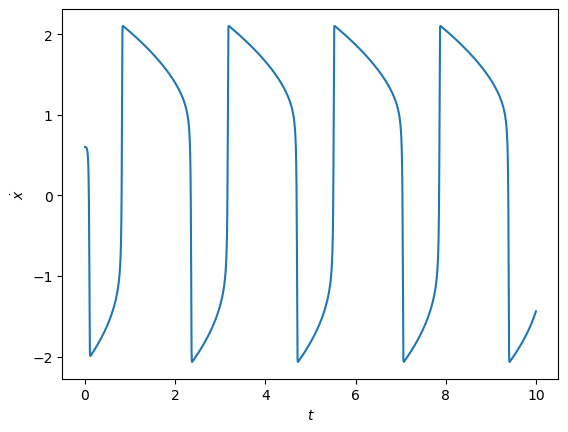

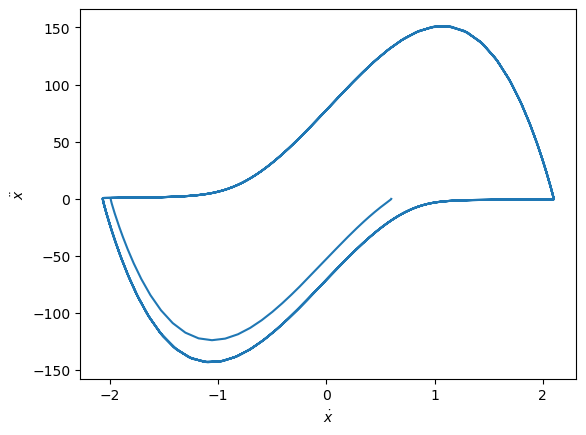

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Euler Method for higher-order ODE
def euler_ize(T, *X0):  # Interval, *Initial Values
   "T:time-axis, x(t0), x'(t0), x''(t0) ..... where t0 is just the first index of T"
   def ODE(f):    # Explicit Differential Equation Function
      X = np.empty([2, len(T)])
# python assignment is just matching two lists! pairs of var-reference 2 values
      X[:, 0] = X0
   # iter(X)      -> iterate row-wise
   # iter(X.T)    -> iterate column-wise
      for i, (t, x) in enumerate(zip(T[:-1], X.T), 1): # zip -> iterate shortest
# absolute index for writing |!!| iterating reference for reading
# point slope linear interpolation
         X[:-1, i] = x[:-1] + h * x[1:]   # just do that in vector form
         X[-1, i] = x[-1] + h * f(t, x)
   # the same as above just that the slope must be calculated \
   #      from the ODE written in its explicit form
      def wrapper():# keeps an internal reference to X
         return X
      return wrapper
   return ODE

# - - - - - - - - - - -

B, L0 = 1., .5

h = .001     # bigger values of h might break numpy floating-numbers arithmetic!
Interval = 0, 10

X0 = .6, 0

# - - - - - - - - - - -

T = np.arange(*Interval, h)

@euler_ize(T, *X0)
def ode(t, x):    # t is there in case you need
   """
      It helps to think about [] as an differential operator
         x[0] is the value of x at the zero-th derivative  -> x(t)
         x[1] is the value of x at the first-th derivative -> x'(t)
         and so on ...
   """
   # rhs of an "explicit" ode
   return -100 * (x[1] * x[0]**2 - B * x[1] + x[0] - L0)

X = ode()

plt.plot(T, X[0, :])

# \ is normally an escape sequence like '\t' or '\n'
## r"" is a raw string which has no escape sequence #WYSIWYG
plt.gca().set(xlabel = r"$t$", ylabel=r"$\dot x$")   # $LaTeX$ needs \

fig, ax = plt.subplots()  # new figure

ax.plot(X[0, :], X[1, :])

ax.set(xlabel = r"$\dot x$", ylabel=r"$\ddot x$");